(457, 608, 3) (457, 608, 3)
(457, 1216, 3)
(457, 608, 3) (457, 608, 3)
[INFO] la_notredame of keypoints detected: 541
[INFO] lb_notredame of keypoints detected: 1545
[INFO] feature vector shape: (541, 128)
[INFO] feature vector shape: (1545, 128)
[[0.61993647 0.78629118 0.67287946 ... 0.51421839 0.45672864 0.71016026]
 [0.38393104 0.44985107 0.36510614 ... 0.29923561 0.25131226 0.43654686]
 [0.35848883 0.47964609 0.43066099 ... 0.31207395 0.31753087 0.40043944]
 ...
 [0.31550232 0.30231497 0.25168702 ... 0.19505242 0.17839332 0.31982654]
 [0.47194761 0.50649548 0.61322099 ... 0.25917217 0.26046571 0.3799594 ]
 [0.30440488 0.61205304 0.50732237 ... 0.46091604 0.42393652 0.46210223]]
The number of matches: 300


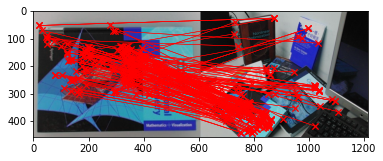

In [8]:
from cmath import exp, pi
from operator import concat
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
# def Gaussian(x,y,sigma=5):
#     gau = (1.0 / 2.0*pi*sigma**2 )* np.exp(-((x**2 + y**2) / (2.0 * sigma**2)))
#     return gau/gau.sum()

# def _filter(m,n):
#     y,x = np.ogrid[-m//2+1:m//2+1,-n//2+1:n//2+1]
#     G = Gaussian(x,y)
#     return G

# def sobel(img):
#     #gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#     gray_img = img/255.0
#     vertical = np.array([[-1 ,0,1], [-2,0,2], [-1,0,1]]) * 1.0/8.0
#     # sobel gradient x
#     Gx = signal.convolve2d(gray_img, vertical)
#     horizontal = np.array([[1,2,1],[0,0,0],[-1,-2,-1]]) * 1.0/8.0
#     # sobel gradient y
#     Gy = signal.convolve2d(gray_img, horizontal)
#     # magnitude
#     G = np.sqrt(np.square(Gx) + np.square(Gy))
#     G *= 255.0 / G.max()
#     plt.imshow(G, cmap="gray")
#     plt.show()

#     # Direction
#     theta = np.arctan2(Gx, Gy)
#     hsv = np.zeros((G.shape[0], G.shape[1], 3))
#     hsv[..., 0] = (theta+ np.pi) / (2 * np.pi)
#     hsv[..., 1] = np.ones((G.shape[0], G.shape[1]))
#     hsv[..., 2] = (G - G.min()) / (G.max() - G.min())
#     rgb = color.hsv2rgb(hsv)
#     plt.imshow(rgb, cmap="gray")
#     plt.savefig('direction.jpg')
#     plt.show()
#     return Gx, Gy, G, theta, rgb

# def structure_matrix(size, dx, dy):
#     # window size
#     filter_ = np.ones((size,size))
#     # Ixx
#     Axx = signal.convolve2d(dx * dx, filter_, mode="same")
#     # Iyy
#     Ayy = signal.convolve2d(dy * dy, filter_, mode="same")
#     # Ixy
#     Axy = signal.convolve2d(dx * dy, filter_, mode="same")

#     landa2, responce = cal_eigen(Axx, Axy, Ayy)
#     landa2 /= np.max(landa2)
#     landa2[responce < np.average(responce)] = 0.0
#     plt.imshow(landa2, cmap="gray")
#     plt.show()
    
#     return Axx, Axy, Ayy, responce, landa2


# def cal_eigen(Axx, Axy, Ayy, k=0.04):
#     det = Axx * Ayy - Axy * Axy
#     trace = Axx + Ayy 

#     landa2 = det/(trace+1e-9)
#     responce = det - k * (trace * trace)

#     return landa2, responce

# def NMS(r, threshold = 0.0001):
#     # larger than threshold
#     mask1 = (r > threshold)
#     # local maximum
#     mask2 = (np.abs(ndimage.maximum_filter(r, size=5) - r) < 1e-15)
#     mask =  (mask1 & mask2) 

#     # plot picture
#     x,y = np.nonzero(mask)
#     return x,y


def plot_images(kp_left_img, kp_right_img): 
    total_kp = np.concatenate((kp_left_img, kp_right_img), axis=1)
    print(total_kp.shape)
    # plt.imshow(total_kp)
    # plt.show()
    return total_kp

def plot_matches(matches, img):
    match_img = img.copy()
    offset = img.shape[1]/2
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.imshow(np.array(match_img).astype('uint8'))
    
    ax.plot(matches[:, 0], matches[:, 1], 'xr')
    ax.plot(matches[:, 2] + offset, matches[:, 3], 'xr')
     
    ax.plot([matches[:, 0], matches[:, 2] + offset], [matches[:, 1], matches[:, 3]],
            'r', linewidth=0.5)
    plt.savefig('matches_.png')
    plt.show()

def SIFT(img1, img2, gray1, gray2):
    # For same shape
    
    img1 = cv2.resize(img1, (608, 457))
    #img2.resize((500,650,3),refcheck=False)
    # descriptor
    sift1 = cv2.SIFT_create(contrastThreshold=0.05, edgeThreshold=10, sigma=1.6)
    sift2 = cv2.SIFT_create(contrastThreshold=0.05, edgeThreshold=30, sigma=1.6)
    kp1, des1 = sift1.detectAndCompute(gray1.astype('uint8'),None)
    kp2, des2 = sift2.detectAndCompute(gray2.astype('uint8'),None)
    # plot merged 
    print(img1.shape, img2.shape)
    img3 = plot_images(img1, img2)
    img_1 = cv2.drawKeypoints(gray1.astype('uint8'),kp1,img1, color=(255,100,255))
    img_2 = cv2.drawKeypoints(gray2.astype('uint8'),kp2,img2, color=(255,100,255))
    print(img1.shape, img2.shape)
    # plt.imshow(img1, cmap="gray")
    # plt.show()
    # plt.imshow(img2, cmap="gray")
    # plt.show()
    print("[INFO] la_notredame of keypoints detected: {}".format(len(kp1)))
    print("[INFO] lb_notredame of keypoints detected: {}".format(len(kp2)))
    print("[INFO] feature vector shape: {}".format(des1.shape))
    print("[INFO] feature vector shape: {}".format(des2.shape))

    # SIFT feature matching
    # similarity
    similarity = np.zeros((des1.shape[0], des2.shape[0]))
    for i in range(des1.shape[0]):
        for j in range(des2.shape[0]):
            # similarity[i][j] = (np.sqrt(np.sum((np.power(a-b,2) for a, b in zip(des1[i], des2[j])))))
            similarity[i][j] = np.dot(des1[i], des2[j]) / (np.linalg.norm(des1[i]) * np.linalg.norm(des2[j]))

    return similarity, img3, kp1, des1, kp2, des2, img1, img2

def match(similarity, kp1, kp2):
    # 2-nearest neighbor
    k = 2
    matches = []
    nn = []
    for idx in range(similarity.shape[0]):
        local = similarity[idx]
        max2min = sorted(local, reverse=True)
        k_nn = np.zeros(k)
        # find index
        best = np.where(local==max2min[0])[0]
        best = list(kp1[idx].pt + kp2[int(best)].pt)
        matches.append(best)
        for i in range(k-1):
            k_nn[i] = np.where(local==max2min[i+1])[0][0]
            match = list(kp1[idx].pt + kp2[int(k_nn[i])].pt)
            nn.append(match)
    print("The number of matches:",len(matches))
    matches = np.array(matches)
    return matches

def improve_match(similarity ,kp1, kp2):
    # 2-nearest-neighbor
    k = 2
    
    matches = []
    legal = True
    for idx in range(similarity.shape[0]):
        legal = True
        local = similarity[idx]
        max2min = sorted(local, reverse=True)
        k_nn = np.zeros(k)
        # find index
        best = np.where(local==max2min[0])[0]
        good = []
        good.append(list(kp1[idx].pt + kp2[int(best)].pt))
        for i in range(k-1):
            k_nn[i] = np.where(local==max2min[i])[0][0]
            if (max2min[0]*0.95 > max2min[i+1]):
                match = list(kp1[idx].pt + kp2[int(k_nn[i])].pt)
                good.append(match)
            else:
                legal=False
        if legal == True:
            matches= matches + good
            
    print("The number of matches:",len(matches))
    matches = np.array(matches)
    return matches

book1 = cv2.imread("1-book1.jpg")
books = cv2.imread("1-image.jpg")
book1_gray = cv2.cvtColor(book1, cv2.COLOR_RGB2GRAY)
books_gray = cv2.cvtColor(books, cv2.COLOR_RGB2GRAY)


### HW 1-2 ###
"""
2(A)
"""
similarity, img3, kp1, des1, kp2, des2, img1, img2 = SIFT(book1, books, book1_gray, books_gray)

# """
# 2(b)
# """
# # Similarity
# # Calculated by SIFT function
# # Similarity = a.b / |a| * |b|
print(similarity)


# match function
# matches = match(similarity, kp1, kp2)

# plot_matches(matches, img3)

# """
# 2(c) Discuss and implement possible solutions to reduce the mis-matches, and show your results.
# """
matches = improve_match(similarity, kp1, kp2)
plot_matches(matches, img3)




In [6]:
random.seed(34)

def homography(pts1, pts2):
    vector = []
    for i in range(len(pts1)):
        vector.append([pts1[i][0], pts1[i][1], 1, 0, 0, 0, -(pts2[i][0] * pts1[i][0]), -(pts2[i][0] * pts1[i][1]), -pts2[i][0]])
        vector.append([0,0,0, pts1[i][0], pts1[i][1], 1, -(pts2[i][1] * pts1[i][0]), -(pts2[i][1] * pts1[i][1]), -pts2[i][1]])
    
    # Decompose ATA
    U, D, V  = np.linalg.svd(vector,full_matrices=True)
    h = V.T[:, 8]
    h = np.reshape(h, (3,3))
    h = (1/h.item(8)) * h

    return h

def cal_error(corr,h):
    pts1 = [corr[0], corr[1], 1]
    pts2 = [corr[2], corr[3], 1]
    estimate_pt2 = h.dot(pts1)
    estimate_pt2 /= estimate_pt2[2]
    error = pts2 - estimate_pt2
    error = np.linalg.norm(error)
    return error

def ransac(matches):
    threshold = 5
    correspondes = []
    max_inliners = []
    final_h = np.zeros((3,3))
    

    for i in range(1000):
        pts1 = []
        pts2 = []
        for i in range(4):
            correspondes = matches[random.randrange(0, len(matches))]
            pts1.append([correspondes[0], correspondes[1]])
            pts2.append([correspondes[2], correspondes[3]])

        h = homography(pts1, pts2)
        inliners = []

        for j in range(len(matches)):
            distance = cal_error(matches[j],h)
#             print(distance)
            if distance < threshold:
                inliners.append(list(matches[j])) 
        if len(inliners) > len(max_inliners):
            final_h = h
            max_inliners = inliners
   # print(max_inliners)

    return final_h, max_inliners


In [ ]:
homo_matrix, inliners = ransac(matches)
inliners = np.array(inliners)
plot_matches(inliners, img3)

In [ ]:
book2 = cv2.imread("1-book2.jpg")
books = cv2.imread("1-image.jpg")
book2_gray = cv2.cvtColor(book2, cv2.COLOR_RGB2GRAY)
similarity, img3, kp1, des1, kp2, des2, img1, img2 = SIFT(book2, books, book2_gray, books_gray)
matches = improve_match(similarity, kp1, kp2)
plot_matches(matches, img3)


In [ ]:
homo_matrix, inliners = ransac(matches)
inliners = np.array(inliners)
plot_matches(inliners, img3)

(457, 608, 3) (457, 608, 3)
(457, 1216, 3)
(457, 608, 3) (457, 608, 3)
[INFO] la_notredame of keypoints detected: 477
[INFO] lb_notredame of keypoints detected: 1545
[INFO] feature vector shape: (477, 128)
[INFO] feature vector shape: (1545, 128)
The number of matches: 154


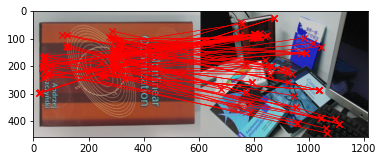

In [9]:
book3 = cv2.imread("1-book3.jpg")
books = cv2.imread("1-image.jpg")
book3_gray = cv2.cvtColor(book3, cv2.COLOR_RGB2GRAY)
similarity, img3, kp1, des1, kp2, des2, img1, img2 = SIFT(book3, books, book3_gray, books_gray)
matches = improve_match(similarity, kp1, kp2)
plot_matches(matches, img3)

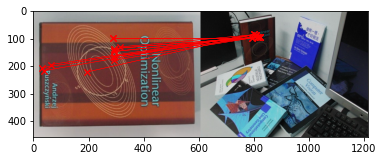

In [10]:
homo_matrix, inliners = ransac(matches)
inliners = np.array(inliners)
plot_matches(inliners, img3)